# day 182,day 184,day 189

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# exercise1:

* Create a straight line dataset using the linear regression formula (weight * X + bias).

* Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.

* Split the data into 80% training, 20% testing.

* Plot the training and testing data so it becomes visual

In [ ]:
# setting the random seed
torch.manual_seed(42)

# device agnotism
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# preparing the data:
weight = 0.3
bias = 0.9
x = torch.randn((1000,1),dtype=torch.float32)
y = weight*x + bias

# splitting the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# device agnoticism
def convert_device(x):
  return x.to(device)

x_train,x_test,y_train,y_test = map(convert_device,(x_train,x_test,y_train,y_test))


# getting data plot ready
def plot_ready(x):

  return x.cpu().numpy().flatten()


# plotting the data.

def prediction_plot(prediction=None):


  # plot the training data
  plt.scatter(x_train.cpu().numpy().flatten(),y_train.cpu().numpy().flatten(),s=15,c='r',label='Train Data')

  # plot the testing data
  plt.scatter(x_test.cpu().numpy().flatten(),y_test.cpu().numpy().flatten(),s=15,c='b',label='Test Data')


  # plot the prediction data
  if prediction is not None:
    plt.scatter(x_test.cpu().numpy().flatten(),y_test.cpu().numpy().flatten(),s=15,c='g',label='Prediction Data')



  plt.legend()
  plt.show()


# instantiating the model

class LinearRegressionModel(torch.nn.Module):

  def __init__(self):
    super().__init__()

    # preparing the linear layer

    self.linear_layer = torch.nn.Linear(in_features=1,
                                        out_features=1,
                                        dtype=torch.float32,
                                        device=device,
                                        bias=True)



  def forward(self,x:torch.Tensor):
    return self.linear_layer(x)


# creating the model
lm = LinearRegressionModel()

# compiling the model
loss = torch.nn.L1Loss()
optimizer = torch.optim.SGD(params=lm.parameters(),
                            lr=0.0159)


# fitting the model
epochs = 100
epoch_container = []
train_loss_container = []
test_loss_container = []

for epoch in range(epochs):

  # training
  lm.train()

  # getting the train_loss
  train_prediction = lm(x_train)
  train_actual = y_train
  train_loss = loss(train_prediction,train_actual)

  # setting the optimizer to zero gradient
  optimizer.zero_grad()

  # back propogatting the train_loss
  train_loss.backward()

  #stepping the optimizer
  optimizer.step()


  # testing
  lm.eval()

  with torch.inference_mode():

    # getting the test_loss
    test_prediction = lm(x_test)
    test_actual = y_test
    test_loss = loss(test_prediction,test_actual)


    # putting things in containers
    epoch_container.append(epoch)
    train_loss_container.append(train_loss)
    test_loss_container.append(test_loss)


    #printing the essentials

    if epoch%10 == 0:
      print('Epoch {} | train_loss{} | test_loss{}'.format(epoch,train_loss,test_loss))
      print(lm.state_dict())




Epoch 0 | train_loss0.934622049331665 | test_loss0.9045969247817993
OrderedDict([('linear_layer.weight', tensor([[-0.6918]])), ('linear_layer.bias', tensor([0.3264]))])
Epoch 10 | train_loss0.8307386040687561 | test_loss0.8036916255950928
OrderedDict([('linear_layer.weight', tensor([[-0.5848]])), ('linear_layer.bias', tensor([0.3975]))])
Epoch 20 | train_loss0.7269880175590515 | test_loss0.7027953863143921
OrderedDict([('linear_layer.weight', tensor([[-0.4772]])), ('linear_layer.bias', tensor([0.4677]))])
Epoch 30 | train_loss0.623384416103363 | test_loss0.6018407344818115
OrderedDict([('linear_layer.weight', tensor([[-0.3688]])), ('linear_layer.bias', tensor([0.5365]))])
Epoch 40 | train_loss0.5199893712997437 | test_loss0.5008193850517273
OrderedDict([('linear_layer.weight', tensor([[-0.2595]])), ('linear_layer.bias', tensor([0.6034]))])
Epoch 50 | train_loss0.41674384474754333 | test_loss0.39985600113868713
OrderedDict([('linear_layer.weight', tensor([[-0.1493]])), ('linear_layer.bi

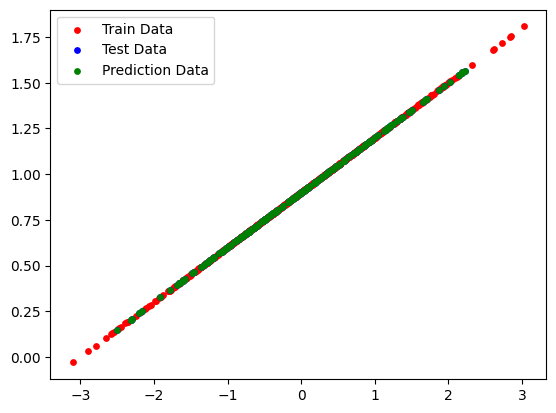

In [ ]:
lm.eval()
with torch.inference_mode():
  test_prediction = lm(x_test)


prediction_plot(prediction=test_prediction)

In [ ]:
test_prediction.shape

torch.Size([200, 1])

# exercise 2: Save your trained model's state_dict() to file.
* Create a new instance of your model class you made in 2. and load in the state_dict() you just saved to it.

* Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [ ]:
from pathlib import Path

model_path = Path('saved_models')
model_path.mkdir(parents=True,exist_ok=True)

model_name = 'Linear_Regression_Handmade'

model_saved_path = model_path / model_name


torch.save(obj = lm.state_dict(),
           f=model_saved_path)

In [ ]:
# load the model
loaded_lm = LinearRegressionModel()

loaded_lm.load_state_dict(torch.load(model_saved_path))

<All keys matched successfully>

In [ ]:
# testing the loaded_model with original_model


with torch.inference_mode():

  original_test_prediction = lm(x_test)
  loaded_test_prediction = loaded_lm(x_test)



sum(original_test_prediction == loaded_test_prediction) == loaded_test_prediction.shape[0]



tensor([True])

# xavier initialization instead random weight and bias initialization in the beginning.


* xavier initialization makes the neural network learn better on data unlike random initialization which might put the values at a far cry distance from the ideal point from whence the model has to learn to reach the ideal point, the xavier initialization first calculates the variance of the data and then it converts the variance between all points in dataset to equal 1, that means they are all equally apart from each other, and then choose a random weight and biases to reach the ideal point.

# gradient descent:

# what is gradient:

* Intuitively it is a slope of a curve at a given point in a specified direction.

# formula:
# $$ p_{n+1} = p_n - lr \nabla f(p_n)  $$

Gradient descent algorithm works only for functions that are:
1. differentiable
2. convex.



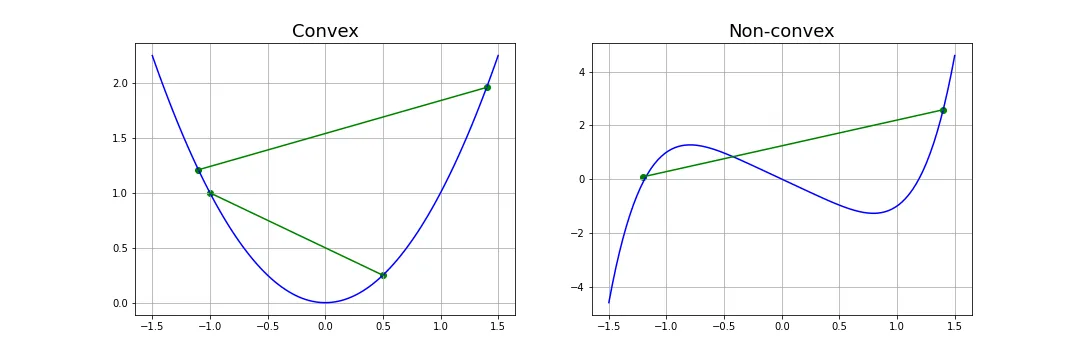

**Another way to check mathematically if a univariate function is convex is to calculate the second derivative and check if its value is always bigger than 0.**

# differentiable functions:
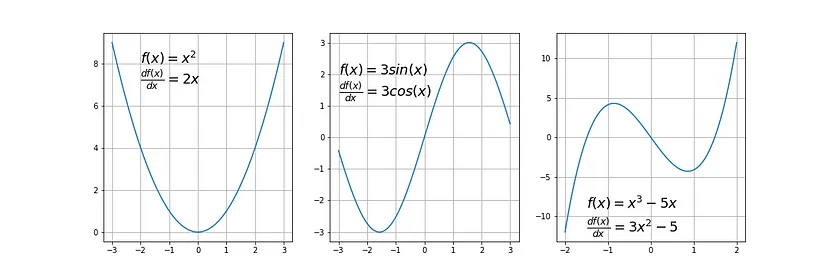

# non-differentiable functions:
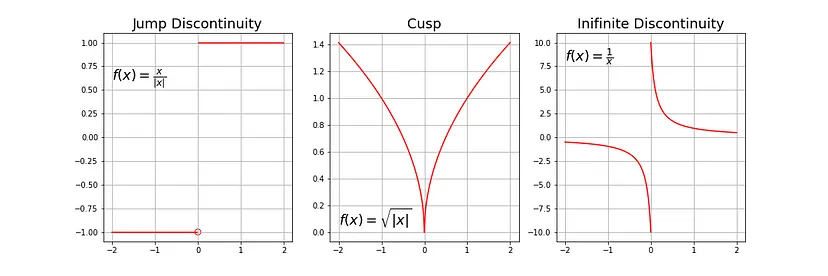

# learning rate impact:
* The smaller learning rate the longer GD converges, or may reach maximum iteration before reaching the optimum point.
* If learning rate is too big the algorithm may not converge to the optimal point (jump around) or even to diverge completely.


In [ ]:
import sympy as sym

x = sym.symbols('x')
fx = x**4 - 2*x**3 + 2

derivative = sym.diff(fx,x)

derivative_2 = sym.diff(derivative,x)
derivative_2

12*x**2 - 12*x

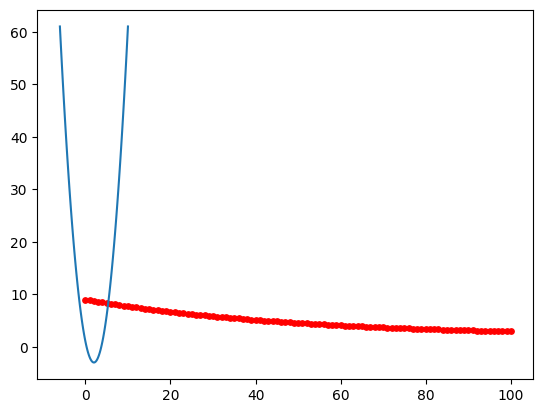

In [ ]:
# gradient


import numpy as np

def gradient_func(fx):
  x = sym.symbols('x')

  derivative = sym.diff(fx)

  return sym.lambdify(x,derivative,'numpy')


def gradient_descent(start, gradient, learn_rate, max_iter, tol=0.01):
  steps = [start] # history tracking
  x = start

  for _ in range(max_iter):
    diff = learn_rate*gradient(x)
    if np.abs(diff)<tol:
      break
    x = x - diff
    steps.append(x) # history tracing

  return steps, x

history, result = gradient_descent(9, gradient_func(x**2-4*x+1), 0.01, 100)

xx = np.linspace(-6,10,100)
yy = xx**2-4*xx+1
plt.plot(xx,yy,label='curve')
plt.scatter(range(len(history)),history,s=15,c='r',label='history_points')


plt.show()

In [ ]:
gradient_func(x**2-4*x+1)(3)

2

24